# How does unsupervised machine learning work?

In supervised machine learning tasks, the data is assigned to some set of classes. For example, here we are given a dataset wherein each observation is a set of physical attributes of an object. In an supervised task, the object column acts as the labels. The algorithm then uses these existing seperations in the data to develop criteria for classifying unknown observations in the data. 

label | Height | Width | Color  | Mass | Round ?
-----  | -------| ------| -------| ---- | -------
Apple  | 6cm    | 7cm   | Red    | 330g | TRUE   
Orange | 6cm    | 7cm   | Orange | 330g | TRUE   
Lemon  | 5cm    | 4cm   | Yellow | 150g | FALSE  

In contrast, in an unsupervised machine learning task there either are no labels or that information is just treated as another attribute of the observation. In our fruit example, the object type is now just another characteristic of the observation, and often is altogether unknown:

object | Height | Width | Color  | Mass | Round ?
-----  | -------| ------| -------| ---- | -------
Apple  | 6cm    | 7cm   | Red    | 330g | TRUE   
Orange | 6cm    | 7cm   | Orange | 330g | TRUE   
Lemon  | 5cm    | 4cm   | Yellow | 150g | FALSE  
 
An unsupervised algorithm is not told how the data is structured or seperated (barring parameter tuning), instead the algorithm goes looking for stucture and seperation in the data. Clustering algorithms seek groupings in the data, and dimension reduction techniques aim to decrese the number of rows and columns in a dataset by finding which features best optimize some goal. Generally speaking, in an unsupervized task there is no existing labeling to compare the results of the algorithm to; instead we often evaluate reliability through repeated experiments, computing the odds of our data being generated by our model, and visualizations. 

![algorithms_cheatsheet](images/algorithms_cheatsheet.png)

## What is topic modeling using LDA?

![diagram showing a collection of texts then an arrow going towards a black box named LDA. On the other side of the black box are two arrows. One is slightly tilted up and points toward three circles. Each circle is a topic and contains a sample of words in that topic. The other arrow is slightly titled down and points towards a document. In the document, words are annotated to indicate which topic they belong to (if any)](images/lda_diagram.png)

One subset of these clustering tasks are topic extraction tasks, where the aim is to find common groupings of items across collections of items. One method of doing so is Latent Dirichlet allocation (LDA). In broad strokes, LDA extracts topics through the following method:<sup>1, 2</sup>

1. Arbitrariy decide that there are 10 topics
2. Select one document and randomly assign each word in the document to one of the 10 topics. 
3. Repeat 2 for all the other documents. This results in the same word being assigned to multiple topics.
4. Compute
    1. how many topics are in each document?
    2. how many topic assignements are due to a given word?
5. Take one word in one document and reassign it to a new topic and then repeat step 4.
6. Repeat step 5 until the model stabilizes such that reassign topics does not change distributions. 

LDA yields the a set of words associated to each topic (4.2) and the mixture of topics associated to each document (4.1).
    

<sup>1</sup>[Introduction to Latent Dirichlet Allocation](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/) by Edward Chen 

<sup>2</sup>[The LDA Buffet is Now Open](http://www.matthewjockers.net/2011/09/29/the-lda-buffet-is-now-open-or-latent-dirichlet-allocation-for-english-majors/) by Matthew Jockers 

<sup>3</sup> Image is inspired by Christine Doig's PyTexas 2015 ["Introduction to Topic Modeling"](http://chdoig.github.io/pytexas2015-topic-modeling/#/) presentation

### Read data in from a spreadsheet
Lets take the data we just saved out and load it back into a dataframe so that we can do some analysis with it!

In [1]:
import pandas as pd
df = pd.read_csv("df_news_romance.csv")
df.head()

,label,sentence,NN,JJ
0,news,"['The', 'Fulton', 'County', 'Grand', 'Jury', '...",11,2
1,news,"['The', 'jury', 'further', 'said', 'in', 'term...",13,2
2,news,"['The', 'September-October', 'term', 'jury', '...",16,2
3,news,"['``', 'Only', 'a', 'relative', 'handful', 'of...",9,3
4,news,"['The', 'jury', 'said', 'it', 'did', 'find', '...",5,3


### Preparing data for machine learning
We're almost ready to do some machine learning!  First, we need to turn our sentences into the type of *feature vectors* LDA expects to work with. 

In [2]:
df['sentence'].head()

0    ['The', 'Fulton', 'County', 'Grand', 'Jury', '...
1    ['The', 'jury', 'further', 'said', 'in', 'term...
2    ['The', 'September-October', 'term', 'jury', '...
3    ['``', 'Only', 'a', 'relative', 'handful', 'of...
4    ['The', 'jury', 'said', 'it', 'did', 'find', '...
Name: sentence, dtype: object

#### Bag of Words
For LDA, we preprocess our data using sklearn's text feature extraction tools. In particular, we use the `CountVectorizer` which computes the frequency of each token in the document. We can strip out stop words using the `stop_words` keyword argument.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(stop_words='english')
tf = tf_vectorizer.fit_transform(df['sentence'])

`CountVectorizer` processes the text such that `tf` is a sparse matrix containing the count of words in each document. One document in the Brown corpus is the following sentence: 
>Mrs. Robert O. Spurdle is chairman of the committee , which includes Mrs. James A. Moody , Mrs. Frank C. Wilkinson , Mrs. Ethel Coles , Mrs. Harold G. Lacy , Mrs. Albert W. Terry , Mrs. Henry M. Chance , 2d , Mrs. Robert O. Spurdle , Jr. , Mrs. Harcourt N. Trimble , Jr. , Mrs. John A. Moller , Mrs. Robert Zeising , Mrs. William G. Kilhour , Mrs. Hughes Cauffman , Mrs. John L. Baringer and Mrs. Clyde Newman .

Via the `CountVectorizer` the stop words, punctuation, and very low frequency words have been removed. This yeilds the words and their counts listed below and visualized in the word cloud. 

```python
{'2d': 1, 'albert': 1, 'baringer': 1, 'cauffman': 1, 'chairman': 1, 'chance': 1, 'clyde': 1, 'coles': 1, 
 'committee': 1, 'ethel': 1, 'frank': 1, 'harcourt': 1, 'harold': 1, 'henry': 1, 'hughes': 1, 'includes': 1, 
 'james': 1, 'john': 2, 'jr': 2, 'kilhour': 1, 'lacy': 1, 'moller': 1, 'moody': 1, 'mrs': 15, 'newman': 1, 
 'robert': 3, 'spurdle': 2, 'terry': 1, 'trimble': 1, 'wilkinson': 1, 'william': 1, 'zeising': 1}

```

![Word cloud visualization, where the size of the word is relative to its frequency in a sentence, of "Mrs. Robert O. Spurdle is chairman of the committee , which includes Mrs. James A. Moody , Mrs. Frank C. Wilkinson , Mrs. Ethel Coles , Mrs. Harold G. Lacy , Mrs. Albert W. Terry , Mrs. Henry M. Chance , 2d , Mrs. Robert O. Spurdle , Jr. , Mrs. Harcourt N. Trimble , Jr. , Mrs. John A. Moller , Mrs. Robert Zeising , Mrs. William G. Kilhour , Mrs. Hughes Cauffman , Mrs. John L. Baringer and Mrs. Clyde Newman ."](images/countvect_wordcloud.png?)

## Let's do topic modeling with sklearn!
One of the best things about sklearn is the simplicity of its syntax.

To do machine learning with sklearn, follow these five steps (the function names remain the same, regardless of the algorithm you use!):

### Step 1:  Import your desired algorithm
In this example, we will be using the [Latent Dirichlet Allocation](http://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation) algorithm. 

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

### Step 2: Create an instance of your machine learning algorithm
 When creating an instance of sklearn's `LatentDirichletAllocation` algorithm to run on our data, we need to set paramters. `n_components` is the number of topics in the dataset and we set `random_state` to 42 so that this notebook is reproducible. Since the sentences happen to already have labels (either news or romance), lets see if LDA can also find those seperations by setting the number of topics to 2. 

In [5]:
num_topics = 2
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

### Step 3:  Fit your data
Using the `lda` object we set up above, we now apply the LDA algorithm to the bag of words we extracted from our sentences and had stored in the `tf` sparse matrix.

In [6]:
lda.fit(tf)

/Users/hannah/miniconda3/envs/nehdri/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=2, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

### Step 4: Transform your data
We now want to model the documents in our corpus in terms of the topics discovered by the model. This is done using the `.transform` method of lda. This function yields the distribution of topics across the documents. The `document_topic` array contains the percentages of each topic found in each document. 

In [7]:
document_topic = lda.transform(tf)

One way to visualize proportions relative to each other are stacked bar and area charts. Since we have approximately 9000 documents, an area chart will work better.

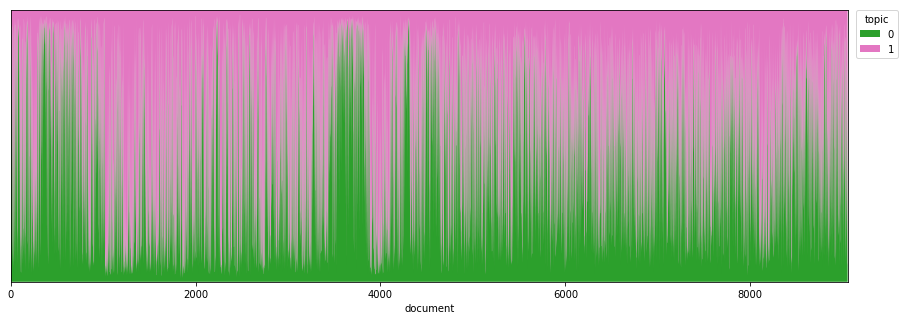

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

colors = ['tab:green', 'tab:pink']
topics = np.arange(10)
num_docs = document_topic.shape[0]

fig, ax = plt.subplots(figsize=(15,5))
_ = ax.stackplot(range(num_docs), document_topic.T, labels=topics, colors=colors)
_ = ax.set_xlim(0, num_docs)
_ = ax.set_ylim(0,1)
_ = ax.set_yticks([])
_ = ax.set_xlabel("document")
_ = ax.legend(title="topic", bbox_to_anchor=(1.06, 1), borderaxespad=0)
fig.savefig("images/doc_topic.png", bbox_inches = 'tight', pad_inches = 0)

### Step 5: Print topics
`lda.components_` is an array where each row is a topic, and each column roughly conatins the number of times that word was assigned to that topic, which is also the probability of that word being in that topic. To figure out which word is which column, we use the `get_feature_names())` function from `CountVectorizer`. the `argsort` function is used to return the indexes of the columns with the highest probabilities, which we then map into our collection of words. Here we print the top 5 words in each topic.

In [9]:
num_words = 10
topic_word  = lda.components_ 
words = np.array(tf_vectorizer.get_feature_names())
for i, topic in enumerate(topic_word):
    # sorting is in descending, so ::-1 reverses to ascending
    sorted_idx = topic.argsort()[::-1]
    print(i, words[sorted_idx][:num_words])

0 ['said' 'like' 'time' 'just' 'll' 'way' 'didn' 'new' 'president' 'thought']
1 ['mrs' 'said' 'home' 'little' 'year' 'day' 'good' 'new' 'got' 'right']


We can also visualize these topics as lists sized by the frequency of the word and colored by the topic, as proposed by Allan Riddell in [Text Analysis with Topic Models for the Humanities and Social Sciences](https://de.dariah.eu/tatom/index.html):

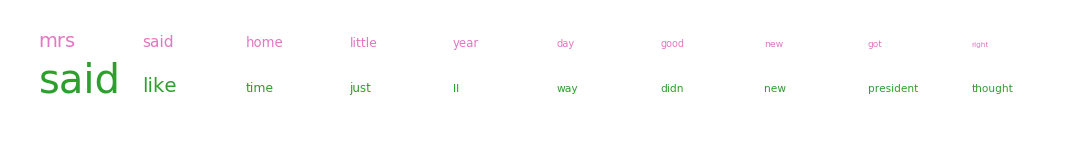

In [10]:
# font size for word with largest share in corpus
fontsize_base = 40/ np.max(topic_word)

fig, ax = plt.subplots(figsize=(15, 2), constrained_layout=True)

for i, topic in enumerate(topic_word):
    top_idx = topic.argsort()[::-1][:num_words]
    top_words = words[top_idx]
    top_share = topic[top_idx]
    for j, (word, share) in enumerate(zip(top_words, top_share)):
        ax.text(j, i/4,  word, fontsize=fontsize_base*share, color=colors[i])
        
#stretch the-axis to accommodate the words
ax.set_xlim(0, num_words)
ax.set_ylim(-.2, i/4+.2)
ax.axis('off')
#fig.subplots_adjust(hspace=-0)
fig.savefig("images/doc_topic.png", bbox_inches = 'tight', pad_inches = 0)
        

### Step 6: Score!
One method of evaluating a model is to compute the chance (probability) of the data we observed showing up in a dataset generated by the model. First we start with the modeled probability density function, which is the theoretical distribution of all topics in our model. We then use the *log likelihood* and the *perplexity* to evaluate the average odds of our observations occuring in the modeled distribution of words and topics. 

![the first is a plot of a normal (gaussian) curve, while the second is a plot of the log likelihood of the curve, and the third plot shows the perplexity of a distribution](images/xkcd_False.png?)
Evaluate the skill of the model by computing the 
* score: approximate log-liklihood - the higher the better
* perplexity: exponent of the negative log likelihood - the lower the better




In [11]:
print(f'Approximate Log Likelihood: {lda.score(tf)}')
print(f'Perplexity: {lda.perplexity(tf)}')

Approximate Log Likelihood: -657835.3569726176
Perplexity: 8218.638504839773


### Step 7: Add supervision: compare topics to labels
We can compare the results of our topic modeling to the labels we already have for the data. First we need to assign a class to the document based on which topic is most prevelant, which we can do using the `argmax` function since it returns the index (which maps directly to the topic) of the cell with the highest value. We then compare these topic based classes to the labes in our dataset. Given the sentences for each topic, we will make the assumption that topic 0 is news and topic 1 is romance. We can`argmax` returns the index of the 

In [12]:
# get the location of the highest value in each column
topic_class = document_topic.argmax(axis=1)
topic_labels = np.empty(topic_class.shape, dtype=object)
topic_labels[topic_class==0] = 'news'
topic_labels[topic_class==1] = 'romance'
topic_labels

array(['news', 'news', 'news', ..., 'news', 'news', 'romance'], dtype=object)

We can now use a confusion matrix to see if there is overlap between the topics and the labels. In a confusion matrix, the data is the counts of true positive, false positive, false negative, and true negative labeing. As a table,it is:

 |actual news | actual romance 
:--: | :--:| :--:
predicted news || 
predicted romance| |

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['label'], topic_labels)

array([[2480, 2143],
       [2540, 1891]])

|actual news | actual romance 
:--: | :--:| :--:
predicted news |2143|2480 
predicted romance|1891 |2540

### Challenge

**Exercise 1**
Unfortunately LDA doesn't seem to work all that well for this dataset. And nothing about the topics indicates a distinction between the romance and news texts...but we already saw that they didn't seem to be all that seperable. Can we get better results by expanding the corpus to include more texts of other types? Or by expanding each document so that it is longer than a sentence? 

**Exercise 2**
Since topic modeling works better with longer texts, what topics do you get if you try to model:
1. Moby Dick
2. Pride and Prejudice
3. Both together?
4. A contemporary text like The Hunger Games